<a href="https://colab.research.google.com/github/dhruvKuchekar123/CODSOFT/blob/main/Fashion_Recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Packages and Libreries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer

import os
from scipy.sparse import coo_matrix

Step 1:Data Loading and Preprocessing

In [2]:
# Read your dataset (replace 'marketing_sample_for_walmart_com-walmart_com_product_review__20200701_20201231__5k_data.tsv' with your dataset path)
train_data = pd.read_csv('/content/drive/MyDrive/E-Commerece-Recommendation-System-Machine-Learning-Product-Recommendation-system--main/Fashion Dataset v2.csv')
train_data.columns

Index(['p_id', 'name', 'products', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'description', 'p_attributes'],
      dtype='object')

In [3]:
train_data = train_data[['p_id', 'name', 'products', 'price', 'colour', 'brand', 'img',
       'ratingCount', 'avg_rating', 'description', 'p_attributes']]
train_data.head(3)

,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,Khushal K,http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,Black printed Kurta with Palazzos with dupatta...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,Orange solid Kurta with Palazzos with dupatta<...,"{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,Navy blue embroidered Kurta with Trousers with...,"{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."


Basic Operation

In [4]:
train_data['products']

,products
0,"Kurta, Palazzos, Dupatta"
1,"Kurta, Palazzos, Floral Print Dupatta"
2,"Kurta, Trousers, Dupatta"
3,"Kurta, Trouser, Dupatta"
4,Kurta
...,...
14209,Sweatshirt
14210,Hooded Sweatshirt
14211,Sweatshirt
14212,Sweatshirt


In [5]:
train_data.shape

(14214, 11)

In [6]:
train_data.isnull().sum()

,0
p_id,0
name,0
products,0
price,0
colour,0
brand,0
img,0
ratingCount,7684
avg_rating,7684
description,0


In [7]:
# Fill missing values in 'avg_rating' with a default value (e.g., 0)
train_data['avg_rating'].fillna(0, inplace=True)
# Fill missing values in 'ratingCount' with a default value (e.g., 0)
train_data['ratingCount'].fillna(0, inplace=True)

<ipython-input-7-7f54e5246ddd>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['avg_rating'].fillna(0, inplace=True)
<ipython-input-7-7f54e5246ddd>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 

In [8]:
train_data.isnull().sum()

,0
p_id,0
name,0
products,0
price,0
colour,0
brand,0
img,0
ratingCount,0
avg_rating,0
description,0


In [9]:
train_data.duplicated().sum()

0

In [10]:
train_data['p_id'] = train_data['p_id'].astype(str) # Convert 'p_id' column to string type
train_data['p_id'].str.extract(r'(\d+)').astype(float)

,0
0,17048614.0
1,16524740.0
2,16331376.0
3,14709966.0
4,11056154.0
...,...
14209,15415116.0
14210,16470114.0
14211,16382150.0
14212,16379664.0


Step 2: EDA(Exploratory Data Analysis)

In [11]:
# Basic statistics
num_users = train_data['p_id'].nunique()
num_items = train_data['products'].nunique()
num_ratings = train_data['avg_rating'].nunique()
print(f"Number of unique users: {num_users}")
print(f"Number of unique items: {num_items}")
print(f"Number of unique ratings: {num_ratings}")

Number of unique users: 14214
Number of unique items: 910
Number of unique ratings: 2368


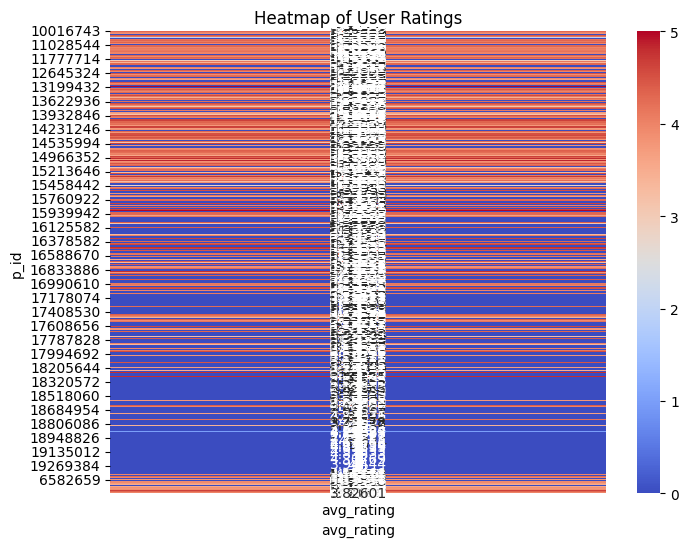

In [12]:
# Pivot the DataFrame to create a heatmap, using a numeric column for aggregation
heatmap_data = train_data.pivot_table(values='avg_rating', index='p_id') # Specify 'values' to use a numeric column for aggregation

# Create the heatmap
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot=True, fmt='g', cmap='coolwarm', cbar=True)
plt.title('Heatmap of User Ratings')
plt.xlabel('avg_rating')
plt.ylabel('p_id')
plt.show()

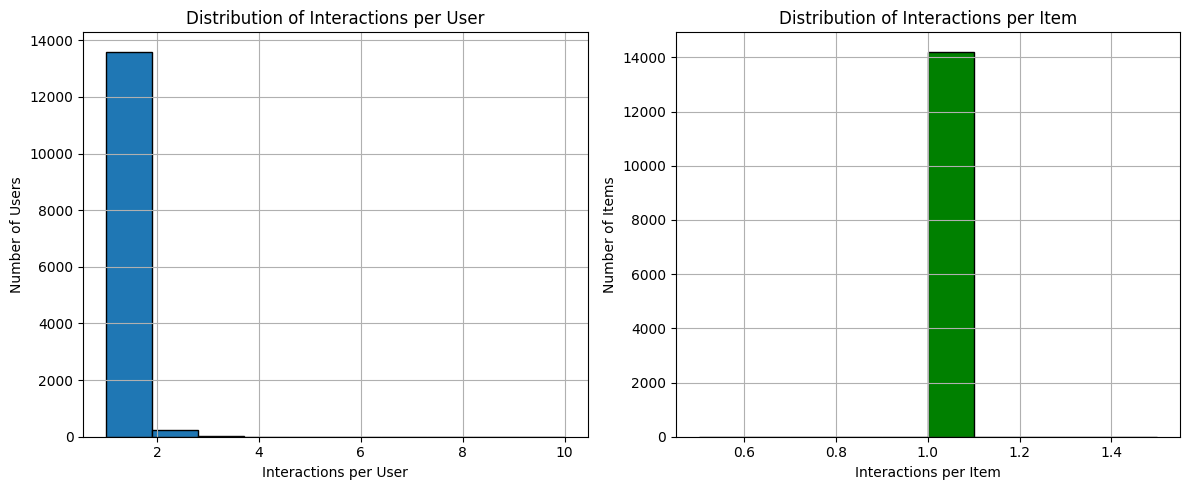

In [13]:
# Distribution of interactions
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
train_data['name'].value_counts().hist(bins=10, edgecolor='k')
plt.xlabel('Interactions per User')
plt.ylabel('Number of Users')
plt.title('Distribution of Interactions per User')

plt.subplot(1, 2, 2)
train_data['p_id'].value_counts().hist(bins=10, edgecolor='k',color='green')
plt.xlabel('Interactions per Item')
plt.ylabel('Number of Items')
plt.title('Distribution of Interactions per Item')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Most Popular items')

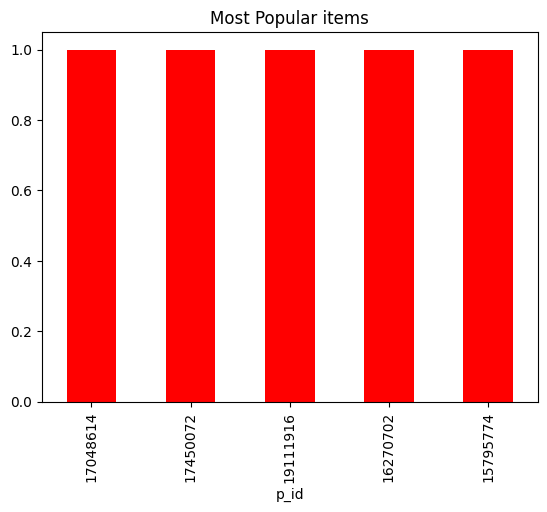

In [14]:
# Most popular items
popular_items = train_data['p_id'].value_counts().head(5)
popular_items.plot(kind='bar',color='red')
plt.title("Most Popular items")

<Axes: xlabel='ratingCount'>

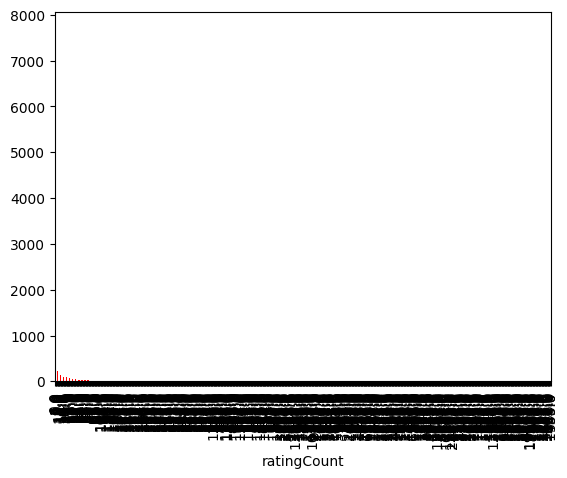

In [15]:
# most rated counts
train_data['ratingCount'].value_counts().plot(kind='bar',color='red')

 Step 3:Data Cleaning and Tags Creation

In [16]:
import spacy
from spacy.lang.en.stop_words import STOP_WORDS

nlp = spacy.load("en_core_web_sm", disable=["ner", "parser", "lemmatizer", "textcat"])

def clean_and_extract_tags(doc):
    tags = [token.text for token in doc if token.text.isalnum() and token.text not in STOP_WORDS]
    return ', '.join(tags)

columns_to_extract_tags_from = ['brand', 'description']

for column in columns_to_extract_tags_from:
    texts = train_data[column].tolist()  # Convert the column to a list for better performance
    docs = nlp.pipe(texts)  # Use spaCy's pipe for efficient batch processing
    train_data[column] = [clean_and_extract_tags(doc) for doc in docs]  # Process the docs


In [17]:
train_data.head(3)

,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,"Khushal, K",http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,"Black, printed, Kurta, Palazzos, dupatta, br, ...","{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899.0,Orange,InWeave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,"Orange, solid, Kurta, Palazzos, dupatta, Kurta...","{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899.0,Navy Blue,Anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,"Navy, blue, embroidered, Kurta, Trousers, dupa...","{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."


Rating Base Recommendations System

In [18]:
average_ratings = train_data.groupby(['name','price','brand','ratingCount','img','description'])['avg_rating'].mean().reset_index()

In [19]:
top_rated_items = average_ratings.sort_values(by='avg_rating', ascending=False)

rating_base_recommendation = top_rated_items.head(10)

In [20]:
top_rated_items.head(10)

,name,price,brand,ratingCount,img,description,avg_rating
2443,Crimsoune Club Women Blue Washed Slim Fit Deni...,1699.0,"Crimsoune, Club",2.0,http://assets.myntassets.com/assets/images/pro...,"Blue, washed, mid, rise, denim, shorts, 5, poc...",5.0
12558,VERO AMORE Women Maroon Washed Insulator Crop ...,3350.0,"VERO, AMORE",3.0,http://assets.myntassets.com/assets/images/157...,"Maroon, washed, solid, insulator, parka, faux,...",5.0
2533,DIVASTRI Navy Blue & Gold-Toned Semi-Stitched ...,5999.0,DIVASTRI,2.0,http://assets.myntassets.com/assets/images/139...,"Navy, blue, gold, toned, woven, design, leheng...",5.0
6724,MISH Blue Culottes & Fitted Crop Shirt Co-Ord Set,3699.0,MISH,5.0,http://assets.myntassets.com/assets/images/157...,"Blue, Shirt, Co, Ord, Set, Fitted, cropped, ut...",5.0
10745,Shaily Off-White & Pink Embroidered Semi-Stitc...,30090.0,Shaily,5.0,http://assets.myntassets.com/assets/images/114...,"Off, White, lehenga, choli, dupatta, thread, w...",5.0
12687,Varanga Women Sea Green & White Bandhani Print...,3999.0,Varanga,5.0,http://assets.myntassets.com/assets/images/182...,"Colour, sea, green, Bandhani, Round, Three, qu...",5.0
11325,Sztori Women Plus Size Magenta Floral Printed ...,1799.0,Sztori,6.0,http://assets.myntassets.com/assets/images/160...,"Colour, Floral, Mandarin, Three, quarter, regu...",5.0
6351,MABISH by Sonal Jain Mustard & Maroon Printed ...,4329.0,"MABISH, Sonal, Jain",2.0,http://assets.myntassets.com/assets/images/154...,"Mustard, maroon, printed, piece, layered, shou...",5.0
3340,FOREVER 21 White & Blue Printed Jumpsuit,2599.0,"FOREVER, 21",6.0,http://assets.myntassets.com/assets/images/182...,"White, blue, printed, playsuit, waist, tie, up...",5.0
10427,Sangria Women Beige Pure Cotton Solid Flared E...,1299.0,Sangria,7.0,http://assets.myntassets.com/assets/images/166...,"b, ABOUT, THE, Sangria, ready, wear, brand, fo...",5.0


In [21]:
rating_base_recommendation['avg_rating'] = rating_base_recommendation['avg_rating'].astype(int)
rating_base_recommendation['ratingCount'] = rating_base_recommendation['ratingCount'].astype(int)

<ipython-input-21-5b44415b62a4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['avg_rating'] = rating_base_recommendation['avg_rating'].astype(int)
<ipython-input-21-5b44415b62a4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation['ratingCount'] = rating_base_recommendation['ratingCount'].astype(int)


In [22]:
print("Rating Base Recommendation System: (Trending Cloths)")
rating_base_recommendation[['name','price','brand','avg_rating','ratingCount','img','description']] = rating_base_recommendation[['name','price','brand','avg_rating','ratingCount','img','description']]
rating_base_recommendation

Rating Base Recommendation System: (Trending Cloths)


<ipython-input-22-67c3e38b6175>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rating_base_recommendation[['name','price','brand','avg_rating','ratingCount','img','description']] = rating_base_recommendation[['name','price','brand','avg_rating','ratingCount','img','description']]


,name,price,brand,ratingCount,img,description,avg_rating
2443,Crimsoune Club Women Blue Washed Slim Fit Deni...,1699.0,"Crimsoune, Club",2,http://assets.myntassets.com/assets/images/pro...,"Blue, washed, mid, rise, denim, shorts, 5, poc...",5
12558,VERO AMORE Women Maroon Washed Insulator Crop ...,3350.0,"VERO, AMORE",3,http://assets.myntassets.com/assets/images/157...,"Maroon, washed, solid, insulator, parka, faux,...",5
2533,DIVASTRI Navy Blue & Gold-Toned Semi-Stitched ...,5999.0,DIVASTRI,2,http://assets.myntassets.com/assets/images/139...,"Navy, blue, gold, toned, woven, design, leheng...",5
6724,MISH Blue Culottes & Fitted Crop Shirt Co-Ord Set,3699.0,MISH,5,http://assets.myntassets.com/assets/images/157...,"Blue, Shirt, Co, Ord, Set, Fitted, cropped, ut...",5
10745,Shaily Off-White & Pink Embroidered Semi-Stitc...,30090.0,Shaily,5,http://assets.myntassets.com/assets/images/114...,"Off, White, lehenga, choli, dupatta, thread, w...",5
12687,Varanga Women Sea Green & White Bandhani Print...,3999.0,Varanga,5,http://assets.myntassets.com/assets/images/182...,"Colour, sea, green, Bandhani, Round, Three, qu...",5
11325,Sztori Women Plus Size Magenta Floral Printed ...,1799.0,Sztori,6,http://assets.myntassets.com/assets/images/160...,"Colour, Floral, Mandarin, Three, quarter, regu...",5
6351,MABISH by Sonal Jain Mustard & Maroon Printed ...,4329.0,"MABISH, Sonal, Jain",2,http://assets.myntassets.com/assets/images/154...,"Mustard, maroon, printed, piece, layered, shou...",5
3340,FOREVER 21 White & Blue Printed Jumpsuit,2599.0,"FOREVER, 21",6,http://assets.myntassets.com/assets/images/182...,"White, blue, printed, playsuit, waist, tie, up...",5
10427,Sangria Women Beige Pure Cotton Solid Flared E...,1299.0,Sangria,7,http://assets.myntassets.com/assets/images/166...,"b, ABOUT, THE, Sangria, ready, wear, brand, fo...",5


Content Base Recommendation system (User Preferences or Item similarities)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['description'])
cosine_similarities_content = cosine_similarity(tfidf_matrix_content,tfidf_matrix_content)

In [ ]:
cosine_similarities_content

array([[1.        , 0.45480362, 0.74767597, ..., 0.10456682, 0.05679697,
        0.04836377],
       [0.45480362, 1.        , 0.34432686, ..., 0.10610047, 0.14247983,
        0.09849078],
       [0.74767597, 0.34432686, 1.        , ..., 0.08752691, 0.11457057,
        0.08364941],
       ...,
       [0.10456682, 0.10610047, 0.08752691, ..., 1.        , 0.41463821,
        0.33081759],
       [0.05679697, 0.14247983, 0.11457057, ..., 0.41463821, 1.        ,
        0.77397547],
       [0.04836377, 0.09849078, 0.08364941, ..., 0.33081759, 0.77397547,
        1.        ]])

In [ ]:
item_name = 'Black printed Kurta with Palazzos with dupatta <br> <br> <b> Kurta design:  </b> <ul> <li> Ethnic motifs printed </li> <li> Anarkali shape </li> <li> Regular style </li> <li> Mandarin collar,  three-quarter regular sleeves </li> <li> Calf length with flared hem </li> <li> Viscose rayon machine weave fabric </li> </ul> <br> <b> Palazzos design:  </b> <ul> <li> Printed Palazzos </li> <li> Elasticated waistband </li> <li> Slip-on closure </li> </ul>Dupatta Length 2.43 meters Width:&nbsp;88 cm<br>The model (height 5)is wearing a size S100% Rayon<br>Machine wash'
# Check if the item name exists in the 'name' column
if item_name in train_data['name'].values:
    item_index = train_data[train_data['name']==item_name].index[0]
else:
    print(f"Item '{item_name}' not found in the dataset.")
    # Handle the case where the item is not found,
    # e.g., assign a default index or skip the recommendation
    item_index = -1  # Or any other suitable value

Item 'Black printed Kurta with Palazzos with dupatta <br> <br> <b> Kurta design:  </b> <ul> <li> Ethnic motifs printed </li> <li> Anarkali shape </li> <li> Regular style </li> <li> Mandarin collar,  three-quarter regular sleeves </li> <li> Calf length with flared hem </li> <li> Viscose rayon machine weave fabric </li> </ul> <br> <b> Palazzos design:  </b> <ul> <li> Printed Palazzos </li> <li> Elasticated waistband </li> <li> Slip-on closure </li> </ul>Dupatta Length 2.43 meters Width:&nbsp;88 cm<br>The model (height 5)is wearing a size S100% Rayon<br>Machine wash' not found in the dataset.


In [ ]:
similar_items = list(enumerate(cosine_similarities_content[item_index]))

In [ ]:
similar_items = sorted(similar_items, key=lambda x:x[1], reverse=True)
top_similar_items = similar_items[1:10]

recommended_items_indics = [x[0] for x in top_similar_items]

In [ ]:
train_data.iloc[recommended_items_indics][['name','ratingCount','brand']]

,name,ratingCount,brand
14212,Vero Moda Women Blue Sweatshirt,0.0,"vero, moda"
13328,Vero Moda Women Grey Sweatshirt,5.0,"vero, moda"
14084,Vero Moda Women Maroon Printed Sweatshirt,0.0,"vero, moda"
13421,Huetrap Women Grey Printed Hooded Sweatshirt,0.0,huetrap
14103,FILA Women Grey Printed Sweatshirt,6.0,fila
13383,Kazo Women Purple Sequin Printed Sweatshirt,7.0,kazo
14098,URBANIC Women Beige Solid Button Pullover Swea...,5.0,urbanic
13227,Tokyo Talkies Women Maroon & Navy Blue Solid S...,1724.0,"tokyo, talkies"
13763,Alsace Lorraine Paris Women Orange & Green Col...,0.0,"alsace, lorraine, paris"


Function To Recommend Product For Content Base

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

def content_based_recommendations(train_data, item_name, top_n=10):
    # Check if the item name exists in the training data
    if item_name not in train_data['name'].values:
        print(f"Item '{item_name}' not found in the training data.")
        return pd.DataFrame()

    # Create a TF-IDF vectorizer for item descriptions
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')

    # Apply TF-IDF vectorization to item descriptions
    tfidf_matrix_content = tfidf_vectorizer.fit_transform(train_data['description'])

    # Calculate cosine similarity between items based on descriptions
    cosine_similarities_content = cosine_similarity(tfidf_matrix_content, tfidf_matrix_content)

    # Find the index of the item
    item_index = train_data[train_data['name'] == item_name].index[0]

    # Get the cosine similarity scores for the item
    similar_items = list(enumerate(cosine_similarities_content[item_index]))

    # Sort similar items by similarity score in descending order
    similar_items = sorted(similar_items, key=lambda x: x[1], reverse=True)

    # Get the top N most similar items (excluding the item itself)
    top_similar_items = similar_items[1:top_n+1]

    # Get the indices of the top similar items
    recommended_item_indices = [x[0] for x in top_similar_items]

    # Get the details of the top similar items
    recommended_items_details = train_data.iloc[recommended_item_indices][['name','price','ratingCount', 'brand', 'img', 'avg_rating']]

    return recommended_items_details

In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'Black printed Kurta with Palazzos with dupatta <br> <br> <b> Kurta design:  </b> <ul> <li> Ethnic motifs printed </li> <li> Anarkali shape </li> <li> Regular style </li> <li> Mandarin collar,  three-quarter regular sleeves </li> <li> Calf length with flared hem </li> <li> Viscose rayon machine weave fabric </li> </ul> <br> <b> Palazzos design:  </b> <ul> <li> Printed Palazzos </li> <li> Elasticated waistband </li> <li> Slip-on closure </li> </ul>Dupatta Length 2.43 meters Width:&nbsp;88 cm<br>The model (height 5)is wearing a size S100% Rayon<br>Machine wash'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

Item 'Black printed Kurta with Palazzos with dupatta <br> <br> <b> Kurta design:  </b> <ul> <li> Ethnic motifs printed </li> <li> Anarkali shape </li> <li> Regular style </li> <li> Mandarin collar,  three-quarter regular sleeves </li> <li> Calf length with flared hem </li> <li> Viscose rayon machine weave fabric </li> </ul> <br> <b> Palazzos design:  </b> <ul> <li> Printed Palazzos </li> <li> Elasticated waistband </li> <li> Slip-on closure </li> </ul>Dupatta Length 2.43 meters Width:&nbsp;88 cm<br>The model (height 5)is wearing a size S100% Rayon<br>Machine wash' not found in the training data.


""


In [ ]:
# Example: Get content-based recommendations for a specific item
item_name = 'Nayo Women Red Floral Printed Kurta With Trouser & Dupatta'
content_based_rec = content_based_recommendations(train_data, item_name, top_n=8)

content_based_rec

,name,ratingCount,brand,img,avg_rating
102,Nayo Women Navy Blue & Pink Floral Printed Pur...,50.0,nayo,http://assets.myntassets.com/assets/images/173...,3.680000
884,Jaipur Kurti Women Turquoise Blue Floral Print...,16.0,"jaipur, kurti",http://assets.myntassets.com/assets/images/155...,4.437500
620,Rudra Bazaar Women Grey & Pink Floral Pleated ...,48.0,"rudra, bazaar",http://assets.myntassets.com/assets/images/156...,3.854167
463,Yuris Women Black & White Pure Cotton Printed ...,267.0,yuris,http://assets.myntassets.com/assets/images/140...,4.239700
580,Vishudh Women Yellow & Off-White Printed Kurta...,51.0,vishudh,http://assets.myntassets.com/assets/images/135...,4.039216
419,AHIKA Women Grey & Gold-Toned Embroidered Pure...,54.0,ahika,http://assets.myntassets.com/assets/images/159...,4.444444
9528,SHAVYA Beige & Red Cotton Blend Unstitched Dre...,0.0,shavya,http://assets.myntassets.com/assets/images/139...,0.000000
153,Yuris Women Grey & White Pure Cotton Printed K...,289.0,yuris,http://assets.myntassets.com/assets/images/140...,4.214533


In [ ]:
train_data.head(3)

,p_id,name,products,price,colour,brand,img,ratingCount,avg_rating,description,p_attributes
0,17048614,Khushal K Women Black Ethnic Motifs Printed Ku...,"Kurta, Palazzos, Dupatta",5099.0,Black,"khushal, k",http://assets.myntassets.com/assets/images/170...,4522.0,4.418399,"Black, printed, Kurta, Palazzos, dupatta, br, ...","{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
1,16524740,InWeave Women Orange Solid Kurta with Palazzos...,"Kurta, Palazzos, Floral Print Dupatta",5899.0,Orange,inweave,http://assets.myntassets.com/assets/images/165...,1081.0,4.119334,"Orange, solid, Kurta, Palazzos, dupatta, Kurta...","{'Add-Ons': 'NA', 'Body Shape ID': '443,333,32..."
2,16331376,Anubhutee Women Navy Blue Ethnic Motifs Embroi...,"Kurta, Trousers, Dupatta",4899.0,Navy Blue,anubhutee,http://assets.myntassets.com/assets/images/163...,1752.0,4.161530,"Navy, blue, embroidered, Kurta, Trousers, dupa...","{'Add-Ons': 'NA', 'Body Shape ID': '333,424', ..."


Collaboration filtering (User Item Similarity)

In [ ]:
rating_item_matrix =train_data.pivot_table(index='ratingCount', columns='p_id', values='avg_rating',aggfunc='mean').fillna(0).astype(int)


In [ ]:
rating_similarity = cosine_similarity(rating_item_matrix)

In [ ]:
target_rating_id = 4
target_rating_index = rating_item_matrix.index.get_loc(target_rating_id)

In [ ]:
rating_similarities = rating_similarity[target_rating_index]

similar_rating_indices = rating_similarities.argsort()[::-1][1:]

In [ ]:
recommend_items = []

for rating_index in similar_rating_indices:
    rated_by_similar_rating = rating_item_matrix.iloc[rating_index]
    not_rated_by_target_rating = (rated_by_similar_rating==0) & (rating_item_matrix.iloc[target_rating_index]==0)

    recommend_items.extend(rating_item_matrix.columns[not_rated_by_target_rating][:10])

recommended_items_details = train_data[train_data['p_id'].isin(recommend_items)][['name','price','ratingCount','brand','img','avg_rating']]

In [ ]:
recommended_items_details.head(10)

,name,price,ratingCount,brand,img,avg_rating
1079,Carlton London Sea Green Floral Peplum Top,1199.0,652.0,"carlton, london",http://assets.myntassets.com/assets/images/100...,4.285276
1807,Veni Vidi Vici Women Black Solid Crop Top,1170.0,493.0,"veni, vidi, vici",http://assets.myntassets.com/assets/images/100...,3.699797
1869,Vishudh Women Peach-Coloured Embroidered Top,1699.0,227.0,vishudh,http://assets.myntassets.com/assets/images/pro...,3.995595
3672,Sera Women Black Solid Loose Fit Regular Shorts,1099.0,10.0,sera,http://assets.myntassets.com/assets/images/pro...,3.700000
5172,Vishudh Women Navy Blue Checked Straight Palazzos,1049.0,516.0,vishudh,http://assets.myntassets.com/assets/images/pro...,3.924419
6274,Cottinfab Women Burgundy Solid Basic Jumpsuit,2149.0,224.0,cottinfab,http://assets.myntassets.com/assets/images/100...,4.107143
6589,Cottinfab Women Pink & Black Printed Layered P...,1899.0,39.0,cottinfab,http://assets.myntassets.com/assets/images/100...,3.974359
7379,Vishudh Red Embroidered Shirt-Style Tunic,1699.0,241.0,vishudh,http://assets.myntassets.com/assets/images/pro...,4.103734
7398,Vishudh Green Printed A-Line Tunic,1249.0,375.0,vishudh,http://assets.myntassets.com/assets/images/pro...,3.845333
7431,Vishudh Peach-Coloured Floral Print Tunic,1249.0,481.0,vishudh,http://assets.myntassets.com/assets/images/pro...,3.916840


Fuction that recommend Items

In [ ]:
def collaborative_filtering_recommendations(train_data, target_product_id, top_n=10):
    """
    Recommends items using collaborative filtering based on a target product.

    Args:
        train_data (pd.DataFrame): The training data containing product ratings.
        target_product_id (int): The ID of the target product for recommendations.
        top_n (int, optional): The number of top recommendations to return. Defaults to 10.

    Returns:
        pd.DataFrame: A DataFrame containing details of the recommended items.
    """
    # Create the rating-item matrix
    rating_item_matrix = train_data.pivot_table(index='products', columns='p_id', values='avg_rating', aggfunc='mean').fillna(0)

    # Calculate the user similarity matrix using cosine similarity
    rating_similarity = cosine_similarity(rating_item_matrix)

    # Find the index of the target product in the matrix
    # Changed target_rating_id to target_product_id for clarity
    try:
        target_rating_index = rating_item_matrix.index.get_loc(target_product_id)
    except KeyError:
        print(f"Target product ID {target_product_id} not found in the data. Returning empty recommendations.")
        return pd.DataFrame()  # Return an empty DataFrame if product ID not found

    # Get the similarity scores for the target product
    rating_similarities = rating_similarity[target_rating_index]

    # Sort the products by similarity in descending order (excluding the target product)
    similar_rating_indices = rating_similarities.argsort()[::-1][1:]

    # Generate recommendations based on similar products
    recommended_items = []

    for rating_index in similar_rating_indices:
        # Get items rated by the similar product but not by the target product
        rated_by_similar_rating = rating_item_matrix.iloc[rating_index]
        not_rated_by_target_rating = (rated_by_similar_rating == 0) & (rating_item_matrix.iloc[target_rating_index] == 0)

        # Extract the item IDs of recommended items
        recommended_items.extend(rating_item_matrix.columns[not_rated_by_target_rating][:top_n])

    # Get the details of recommended items
    recommended_items_details = train_data[train_data['p_id'].isin(recommended_items)][['name','price', 'ratingCount', 'brand', 'img', 'avg_rating']]

    return recommended_items_details.head(10)

In [ ]:
# Example usage
target_product_id = 4
top_n = 5
collaborative_filtering_rec = collaborative_filtering_recommendations(train_data, target_product_id)
print(f"Top {top_n} recommendations for User {target_product_id}:")
collaborative_filtering_rec

Target product ID 4 not found in the data. Returning empty recommendations.
Top 5 recommendations for User 4:


""


Hybrid Recommendations

In [ ]:
# Hybrid Recommendations (Combine Content-Based and Collaborative Filtering)
def hybrid_recommendations(train_data,target_product_id, item_name, top_n=10):
    # Get content-based recommendations
    content_based_rec = content_based_recommendations(train_data,item_name, top_n)

    # Get collaborative filtering recommendations
    collaborative_filtering_rec = collaborative_filtering_recommendations(train_data,target_product_id, top_n)

    # Merge and deduplicate the recommendations
    hybrid_rec = pd.concat([content_based_rec, collaborative_filtering_rec]).drop_duplicates()

    return hybrid_rec.head(10)

In [ ]:
# Example usage: Get hybrid recommendations for a specific user and item
target_product_id = 4 # Change this to the product_id you want recommendations for
item_name = 'Nayo Women Red Floral Printed Kurta With Trouser & Dupatta'  # Change this to the item name
hybrid_rec = hybrid_recommendations(train_data,target_product_id, item_name, top_n=10)

print(f"Top 10 Hybrid Recommendations for User {target_product_id} and Item '{item_name}':")
hybrid_rec

Target product ID 4 not found in the data. Returning empty recommendations.
Top 10 Hybrid Recommendations for User 4 and Item 'Nayo Women Red Floral Printed Kurta With Trouser & Dupatta':


,name,price,ratingCount,brand,img,avg_rating
102,Nayo Women Navy Blue & Pink Floral Printed Pur...,3749.0,50.0,nayo,http://assets.myntassets.com/assets/images/173...,3.680000
884,Jaipur Kurti Women Turquoise Blue Floral Print...,5499.0,16.0,"jaipur, kurti",http://assets.myntassets.com/assets/images/155...,4.437500
620,Rudra Bazaar Women Grey & Pink Floral Pleated ...,6999.0,48.0,"rudra, bazaar",http://assets.myntassets.com/assets/images/156...,3.854167
463,Yuris Women Black & White Pure Cotton Printed ...,3499.0,267.0,yuris,http://assets.myntassets.com/assets/images/140...,4.239700
580,Vishudh Women Yellow & Off-White Printed Kurta...,3649.0,51.0,vishudh,http://assets.myntassets.com/assets/images/135...,4.039216
419,AHIKA Women Grey & Gold-Toned Embroidered Pure...,3487.0,54.0,ahika,http://assets.myntassets.com/assets/images/159...,4.444444
9528,SHAVYA Beige & Red Cotton Blend Unstitched Dre...,3599.0,0.0,shavya,http://assets.myntassets.com/assets/images/139...,0.000000
153,Yuris Women Grey & White Pure Cotton Printed K...,4299.0,289.0,yuris,http://assets.myntassets.com/assets/images/140...,4.214533
939,Anouk Women Pink & Orange Bandhani Printed Pur...,3499.0,41.0,anouk,http://assets.myntassets.com/assets/images/170...,3.585366
452,Yufta Women Peach-Colour Ethnic Motifs Block P...,3499.0,274.0,yufta,http://assets.myntassets.com/assets/images/149...,4.441606
